<a href="https://colab.research.google.com/github/aysuyildizcaldiran/data_visualization/blob/main/AllSummer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score,median_absolute_error

In [2]:
data=pd.read_csv("insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Label Encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


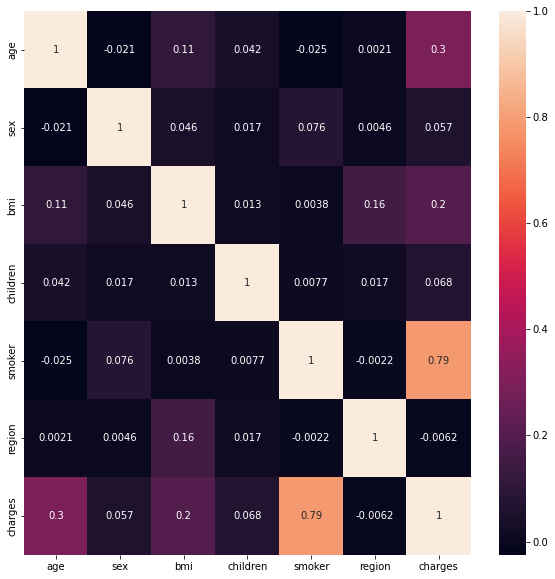

In [7]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

Veri Görselleştirme

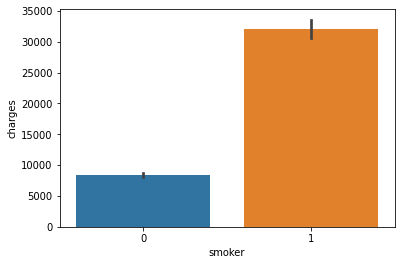

In [8]:
sns.barplot(x=data['smoker'],y=data['charges'])

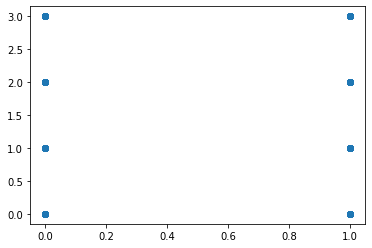

In [9]:
plt.scatter(x=data['smoker'],y=data['region'])


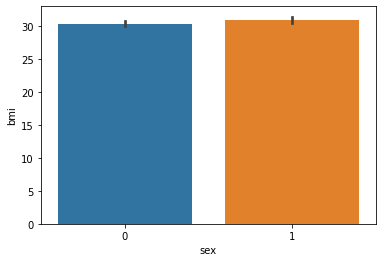

In [10]:
sns.barplot(x=data['sex'],y=data['bmi'])

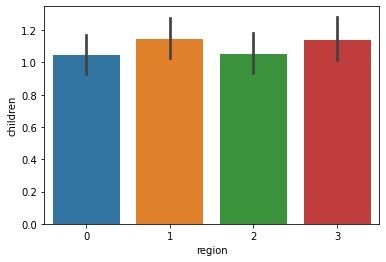

In [11]:
sns.barplot(x=data['region'],y=data['children'])

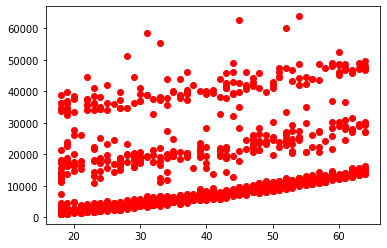

In [12]:
plt.scatter(x=data['age'],y=data['charges'],color='red')


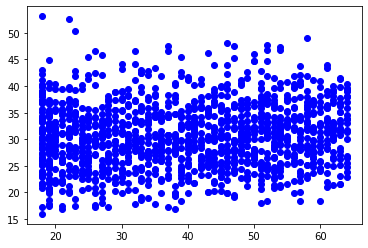

In [13]:
plt.scatter(x=data['age'],y=data['bmi'],color='blue')


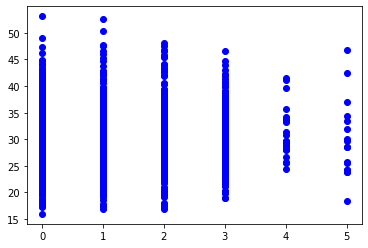

In [14]:

plt.scatter(x=data['children'],y=data['bmi'],color='blue')

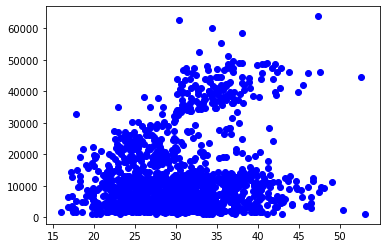

In [15]:
plt.scatter(x=data['bmi'],y=data['charges'],color='blue')

Bağımlı Bağımsız Değişkenlerin Ayrılması

In [16]:
x=data.iloc[:,:6].values
y=data.iloc[:,6:].values

Test ve Eğitim Veri Seti Ayrıştırılması

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Lineer Regresyon** 

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg = reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

In [19]:
print("R-Kare=%0.2f"%r2_score(y_test,y_pred))
print("MAE=%0.2f"%mean_absolute_error(y_test,y_pred))
print("MSE=%0.2f"%mean_squared_error(y_test,y_pred))
print("MedAE=%0.2f"%median_absolute_error(y_test,y_pred))
print("RMSE=%0.2f"%np.sqrt(mean_squared_error(y_test,y_pred)))

R-Kare=0.80
MAE=3930.33
MSE=31845929.13
MedAE=2334.69
RMSE=5643.22


Çoklu Doğrusal Regresyon

In [20]:
X=np.append(arr=np.ones((1338,1)).astype(int),values=x,axis=1)
import statsmodels.api as sm 
X_yeni=X[:,[0,1,2,3,4,5]]
model_regresyon_OLS=sm.OLS(endog=y,exog=X_yeni).fit()
print(model_regresyon_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:10:36   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.205e+04    951.260    -12.670      0.0

In [21]:
X_iki=X[:,[0,1,3,4,5]]
model_regresyon_OLS=sm.OLS(endog=y,exog=X_iki).fit()
print(model_regresyon_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:10:36   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X_iki,y,test_size=0.2,random_state=0)
reg = reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [23]:

print("R-Kare=%0.2f"%r2_score(y_test,y_pred))
print("MAE=%0.2f"%mean_absolute_error(y_test,y_pred))
print("MSE=%0.2f"%mean_squared_error(y_test,y_pred))
print("MedAE=%0.2f"%median_absolute_error(y_test,y_pred))
print("RMSE=%0.2f"%np.sqrt(mean_squared_error(y_test,y_pred)))


R-Kare=0.80
MAE=3941.07
MSE=32171708.57
MedAE=2234.03
RMSE=5672.01


Lineer Regresyon : 
R-Kare=0.80
MAE=3930.33
MSE=31845929.13
MedAE=2334.69
RMSE=5643.22


Çoklu Regresyon :
R-Kare=0.80
MAE=3941.07
MSE=32171708.57
MedAE=2234.03
RMSE=5672.01

`**Sonuç:**`
`2 Modeli karşılaştırdığımızda aralarında çok fark olmadığını görüyoruz. Her ikisi de uygun`